In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# generate three gaussian clouds
def gen_multivariate(x_mean, y_mean):
    mean = [x_mean, y_mean]
    cov = [[1, 0], [0, 1]]
    return np.random.multivariate_normal(mean, cov, 100)

In [120]:
data = np.vstack([gen_multivariate(-5, 5), 
                 gen_multivariate(-3, -2), 
                 gen_multivariate(5, -5)]) 

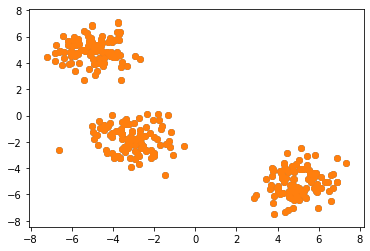

In [121]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], data[:,1])

In [131]:
centroids = [np.random.uniform(low = -3, high = 3, size=2) for _ in range(3)]

In [132]:
def compute_distances(point, centroid):
    return np.sqrt(np.square(point - centroid).sum())

def assign_centroid(point):
    distances = [compute_distances(point, centroid) for centroid in centroids]
    return np.argmin(distances)

def assign_all_centroids(data):
    return np.array([assign_centroid(i) for i in data])

def compute_means(data, centroids):
    return [data[assign_all_centroids(data)==i].mean(axis=0) for i in range(len(centroids))]

def update_centroids(data, centroids):
    new_means = compute_means(data, centroids)
    for i,j in enumerate(new_means):
        if not any(np.isnan(j)):
            centroids[i]=j
    plt.scatter(data[:,0], data[:,1])
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1])
    plt.show()
    return centroids
    

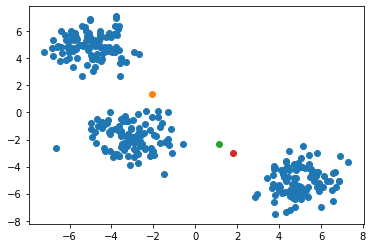

In [133]:
# plot starting positions
plt.scatter(data[:,0], data[:,1])
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1])

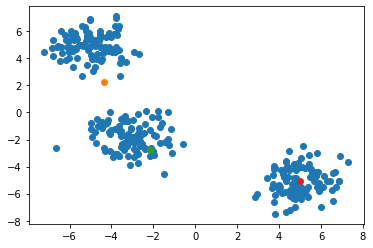

In [134]:
# run updates
centroids = update_centroids(data, centroids)

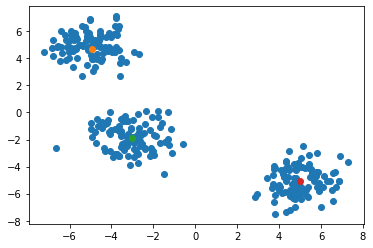

In [135]:
centroids = update_centroids(data, centroids)

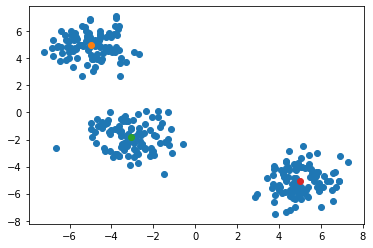

In [136]:
centroids = update_centroids(data, centroids)